Burhanudin Yusuf Habibi

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_excel('DATA OUT CONS.xlsx')
df

,Item,AIR AKI,AMPLAS DISC P-80,"AMPLAS DISC P.120 5""",AMPLAS DISC SUSUN GRIT,"AMPLAS EKAMET 4"" x 400",AMPLAS NO 1200,AMPLAS NO 2000,AMPLAS NO 400,AMPLAS NO 80,...,SAGU,SARUNG TANGAN 5 BENANG,SARUNG TANGAN PENGANTIN,SIKAT KAWAT HALUS,SIKAT KAWAT KASAR,SPONGE BUFF,TALI RAFIA,TALI STRAPPING BAND KUNING,WD-40,WD-SILICON
0,JAN_22,10,300,250,80,0,405,100,700,300,...,0,1428,384,0,0,70,2,10,24,12
1,FEB_22,5,50,150,60,0,220,200,300,100,...,0,1388,240,0,0,40,8,8,8,0
2,MAR_22,5,250,900,330,100,0,200,1700,200,...,50,1092,360,0,0,40,4,0,2,25
3,APR_22,10,200,400,140,0,0,0,400,200,...,25,1128,312,0,0,0,0,20,3,0
4,MEI_22,10,50,430,50,0,0,200,706,50,...,0,910,388,0,0,0,1,23,5,0
5,JUN_22,10,0,500,70,0,100,100,1049,0,...,0,900,396,0,6,19,8,0,8,24
6,JUL_22,10,125,600,90,0,100,100,900,125,...,25,2067,324,0,0,54,16,4,7,0
7,AGS_22,5,500,600,110,0,300,0,500,500,...,25,788,228,0,3,45,5,0,0,0
8,SEP_22,5,100,100,50,0,200,300,500,100,...,0,867,336,0,1,15,13,0,8,0
9,OKT_22,0,0,460,100,0,100,300,400,0,...,0,924,204,0,0,66,24,4,0,0


In [3]:
df = df.rename(columns={'Item': 'Bulan'})
df

,Bulan,AIR AKI,AMPLAS DISC P-80,"AMPLAS DISC P.120 5""",AMPLAS DISC SUSUN GRIT,"AMPLAS EKAMET 4"" x 400",AMPLAS NO 1200,AMPLAS NO 2000,AMPLAS NO 400,AMPLAS NO 80,...,SAGU,SARUNG TANGAN 5 BENANG,SARUNG TANGAN PENGANTIN,SIKAT KAWAT HALUS,SIKAT KAWAT KASAR,SPONGE BUFF,TALI RAFIA,TALI STRAPPING BAND KUNING,WD-40,WD-SILICON
0,JAN_22,10,300,250,80,0,405,100,700,300,...,0,1428,384,0,0,70,2,10,24,12
1,FEB_22,5,50,150,60,0,220,200,300,100,...,0,1388,240,0,0,40,8,8,8,0
2,MAR_22,5,250,900,330,100,0,200,1700,200,...,50,1092,360,0,0,40,4,0,2,25
3,APR_22,10,200,400,140,0,0,0,400,200,...,25,1128,312,0,0,0,0,20,3,0
4,MEI_22,10,50,430,50,0,0,200,706,50,...,0,910,388,0,0,0,1,23,5,0
5,JUN_22,10,0,500,70,0,100,100,1049,0,...,0,900,396,0,6,19,8,0,8,24
6,JUL_22,10,125,600,90,0,100,100,900,125,...,25,2067,324,0,0,54,16,4,7,0
7,AGS_22,5,500,600,110,0,300,0,500,500,...,25,788,228,0,3,45,5,0,0,0
8,SEP_22,5,100,100,50,0,200,300,500,100,...,0,867,336,0,1,15,13,0,8,0
9,OKT_22,0,0,460,100,0,100,300,400,0,...,0,924,204,0,0,66,24,4,0,0


df.set_index('Bulan', inplace=True)
df

In [4]:
db = df.bfill()
db

,Bulan,AIR AKI,AMPLAS DISC P-80,"AMPLAS DISC P.120 5""",AMPLAS DISC SUSUN GRIT,"AMPLAS EKAMET 4"" x 400",AMPLAS NO 1200,AMPLAS NO 2000,AMPLAS NO 400,AMPLAS NO 80,...,SAGU,SARUNG TANGAN 5 BENANG,SARUNG TANGAN PENGANTIN,SIKAT KAWAT HALUS,SIKAT KAWAT KASAR,SPONGE BUFF,TALI RAFIA,TALI STRAPPING BAND KUNING,WD-40,WD-SILICON
0,JAN_22,10,300,250,80,0,405,100,700,300,...,0,1428,384,0,0,70,2,10,24,12
1,FEB_22,5,50,150,60,0,220,200,300,100,...,0,1388,240,0,0,40,8,8,8,0
2,MAR_22,5,250,900,330,100,0,200,1700,200,...,50,1092,360,0,0,40,4,0,2,25
3,APR_22,10,200,400,140,0,0,0,400,200,...,25,1128,312,0,0,0,0,20,3,0
4,MEI_22,10,50,430,50,0,0,200,706,50,...,0,910,388,0,0,0,1,23,5,0
5,JUN_22,10,0,500,70,0,100,100,1049,0,...,0,900,396,0,6,19,8,0,8,24
6,JUL_22,10,125,600,90,0,100,100,900,125,...,25,2067,324,0,0,54,16,4,7,0
7,AGS_22,5,500,600,110,0,300,0,500,500,...,25,788,228,0,3,45,5,0,0,0
8,SEP_22,5,100,100,50,0,200,300,500,100,...,0,867,336,0,1,15,13,0,8,0
9,OKT_22,0,0,460,100,0,100,300,400,0,...,0,924,204,0,0,66,24,4,0,0


In [5]:
encoder = preprocessing.LabelEncoder ()

In [6]:
df['Bulan'] = encoder.fit(df['Bulan']).transform(df['Bulan'])
df

,Bulan,AIR AKI,AMPLAS DISC P-80,"AMPLAS DISC P.120 5""",AMPLAS DISC SUSUN GRIT,"AMPLAS EKAMET 4"" x 400",AMPLAS NO 1200,AMPLAS NO 2000,AMPLAS NO 400,AMPLAS NO 80,...,SAGU,SARUNG TANGAN 5 BENANG,SARUNG TANGAN PENGANTIN,SIKAT KAWAT HALUS,SIKAT KAWAT KASAR,SPONGE BUFF,TALI RAFIA,TALI STRAPPING BAND KUNING,WD-40,WD-SILICON
0,5,10,300,250,80,0,405,100,700,300,...,0,1428,384,0,0,70,2,10,24,12
1,3,5,50,150,60,0,220,200,300,100,...,0,1388,240,0,0,40,8,8,8,0
2,9,5,250,900,330,100,0,200,1700,200,...,50,1092,360,0,0,40,4,0,2,25
3,1,10,200,400,140,0,0,0,400,200,...,25,1128,312,0,0,0,0,20,3,0
4,10,10,50,430,50,0,0,200,706,50,...,0,910,388,0,0,0,1,23,5,0
5,8,10,0,500,70,0,100,100,1049,0,...,0,900,396,0,6,19,8,0,8,24
6,7,10,125,600,90,0,100,100,900,125,...,25,2067,324,0,0,54,16,4,7,0
7,0,5,500,600,110,0,300,0,500,500,...,25,788,228,0,3,45,5,0,0,0
8,13,5,100,100,50,0,200,300,500,100,...,0,867,336,0,1,15,13,0,8,0
9,12,0,0,460,100,0,100,300,400,0,...,0,924,204,0,0,66,24,4,0,0


In [7]:
df

,Bulan,AIR AKI,AMPLAS DISC P-80,"AMPLAS DISC P.120 5""",AMPLAS DISC SUSUN GRIT,"AMPLAS EKAMET 4"" x 400",AMPLAS NO 1200,AMPLAS NO 2000,AMPLAS NO 400,AMPLAS NO 80,...,SAGU,SARUNG TANGAN 5 BENANG,SARUNG TANGAN PENGANTIN,SIKAT KAWAT HALUS,SIKAT KAWAT KASAR,SPONGE BUFF,TALI RAFIA,TALI STRAPPING BAND KUNING,WD-40,WD-SILICON
0,5,10,300,250,80,0,405,100,700,300,...,0,1428,384,0,0,70,2,10,24,12
1,3,5,50,150,60,0,220,200,300,100,...,0,1388,240,0,0,40,8,8,8,0
2,9,5,250,900,330,100,0,200,1700,200,...,50,1092,360,0,0,40,4,0,2,25
3,1,10,200,400,140,0,0,0,400,200,...,25,1128,312,0,0,0,0,20,3,0
4,10,10,50,430,50,0,0,200,706,50,...,0,910,388,0,0,0,1,23,5,0
5,8,10,0,500,70,0,100,100,1049,0,...,0,900,396,0,6,19,8,0,8,24
6,7,10,125,600,90,0,100,100,900,125,...,25,2067,324,0,0,54,16,4,7,0
7,0,5,500,600,110,0,300,0,500,500,...,25,788,228,0,3,45,5,0,0,0
8,13,5,100,100,50,0,200,300,500,100,...,0,867,336,0,1,15,13,0,8,0
9,12,0,0,460,100,0,100,300,400,0,...,0,924,204,0,0,66,24,4,0,0


In [8]:
mean = df.mean()
df.replace(0, mean, inplace=True)
df

,Bulan,AIR AKI,AMPLAS DISC P-80,"AMPLAS DISC P.120 5""",AMPLAS DISC SUSUN GRIT,"AMPLAS EKAMET 4"" x 400",AMPLAS NO 1200,AMPLAS NO 2000,AMPLAS NO 400,AMPLAS NO 80,...,SAGU,SARUNG TANGAN 5 BENANG,SARUNG TANGAN PENGANTIN,SIKAT KAWAT HALUS,SIKAT KAWAT KASAR,SPONGE BUFF,TALI RAFIA,TALI STRAPPING BAND KUNING,WD-40,WD-SILICON
0,5.0,10.000000,300.000000,250,80,7.142857,405.000000,100.000000,700,300.000000,...,9.214286,1428,384,0,0.714286,70.000000,2.000000,10.0,24.000000,12.000000
1,3.0,5.000000,50.000000,150,60,7.142857,220.000000,200.000000,300,100.000000,...,9.214286,1388,240,0,0.714286,40.000000,8.000000,8.0,8.000000,5.071429
2,9.0,5.000000,250.000000,900,330,100.000000,123.214286,200.000000,1700,200.000000,...,50.000000,1092,360,0,0.714286,40.000000,4.000000,9.5,2.000000,25.000000
3,1.0,10.000000,200.000000,400,140,7.142857,123.214286,135.714286,400,200.000000,...,25.000000,1128,312,0,0.714286,29.428571,8.142857,20.0,3.000000,5.071429
4,10.0,10.000000,50.000000,430,50,7.142857,123.214286,200.000000,706,50.000000,...,9.214286,910,388,0,0.714286,29.428571,1.000000,23.0,5.000000,5.071429
5,8.0,10.000000,146.428571,500,70,7.142857,100.000000,100.000000,1049,146.428571,...,9.214286,900,396,0,6.000000,19.000000,8.000000,9.5,8.000000,24.000000
6,7.0,10.000000,125.000000,600,90,7.142857,100.000000,100.000000,900,125.000000,...,25.000000,2067,324,0,0.714286,54.000000,16.000000,4.0,7.000000,5.071429
7,6.5,5.000000,500.000000,600,110,7.142857,300.000000,135.714286,500,500.000000,...,25.000000,788,228,0,3.000000,45.000000,5.000000,9.5,5.285714,5.071429
8,13.0,5.000000,100.000000,100,50,7.142857,200.000000,300.000000,500,100.000000,...,9.214286,867,336,0,1.000000,15.000000,13.000000,9.5,8.000000,5.071429
9,12.0,6.071429,146.428571,460,100,7.142857,100.000000,300.000000,400,146.428571,...,9.214286,924,204,0,0.714286,66.000000,24.000000,4.0,5.285714,5.071429


In [9]:
imputer = SimpleImputer(strategy='mean')
df['FLUX ALLOY'] = imputer.fit_transform(df[['FLUX ALLOY']])

In [10]:
imputer = SimpleImputer(strategy='mean')
df['MATA BOR NO. 10'] = imputer.fit_transform(df[['MATA BOR NO. 10']])

In [11]:
df = df.dropna()

In [12]:
df

,Bulan,AIR AKI,AMPLAS DISC P-80,"AMPLAS DISC P.120 5""",AMPLAS DISC SUSUN GRIT,"AMPLAS EKAMET 4"" x 400",AMPLAS NO 1200,AMPLAS NO 2000,AMPLAS NO 400,AMPLAS NO 80,...,SAGU,SARUNG TANGAN 5 BENANG,SARUNG TANGAN PENGANTIN,SIKAT KAWAT HALUS,SIKAT KAWAT KASAR,SPONGE BUFF,TALI RAFIA,TALI STRAPPING BAND KUNING,WD-40,WD-SILICON
0,5.0,10.000000,300.000000,250,80,7.142857,405.000000,100.000000,700,300.000000,...,9.214286,1428,384,0,0.714286,70.000000,2.000000,10.0,24.000000,12.000000
1,3.0,5.000000,50.000000,150,60,7.142857,220.000000,200.000000,300,100.000000,...,9.214286,1388,240,0,0.714286,40.000000,8.000000,8.0,8.000000,5.071429
2,9.0,5.000000,250.000000,900,330,100.000000,123.214286,200.000000,1700,200.000000,...,50.000000,1092,360,0,0.714286,40.000000,4.000000,9.5,2.000000,25.000000
3,1.0,10.000000,200.000000,400,140,7.142857,123.214286,135.714286,400,200.000000,...,25.000000,1128,312,0,0.714286,29.428571,8.142857,20.0,3.000000,5.071429
4,10.0,10.000000,50.000000,430,50,7.142857,123.214286,200.000000,706,50.000000,...,9.214286,910,388,0,0.714286,29.428571,1.000000,23.0,5.000000,5.071429
5,8.0,10.000000,146.428571,500,70,7.142857,100.000000,100.000000,1049,146.428571,...,9.214286,900,396,0,6.000000,19.000000,8.000000,9.5,8.000000,24.000000
6,7.0,10.000000,125.000000,600,90,7.142857,100.000000,100.000000,900,125.000000,...,25.000000,2067,324,0,0.714286,54.000000,16.000000,4.0,7.000000,5.071429
7,6.5,5.000000,500.000000,600,110,7.142857,300.000000,135.714286,500,500.000000,...,25.000000,788,228,0,3.000000,45.000000,5.000000,9.5,5.285714,5.071429
8,13.0,5.000000,100.000000,100,50,7.142857,200.000000,300.000000,500,100.000000,...,9.214286,867,336,0,1.000000,15.000000,13.000000,9.5,8.000000,5.071429
9,12.0,6.071429,146.428571,460,100,7.142857,100.000000,300.000000,400,146.428571,...,9.214286,924,204,0,0.714286,66.000000,24.000000,4.0,5.285714,5.071429


In [13]:
df1 = df.astype(int)
df = df.astype(int)

In [14]:
df

,Bulan,AIR AKI,AMPLAS DISC P-80,"AMPLAS DISC P.120 5""",AMPLAS DISC SUSUN GRIT,"AMPLAS EKAMET 4"" x 400",AMPLAS NO 1200,AMPLAS NO 2000,AMPLAS NO 400,AMPLAS NO 80,...,SAGU,SARUNG TANGAN 5 BENANG,SARUNG TANGAN PENGANTIN,SIKAT KAWAT HALUS,SIKAT KAWAT KASAR,SPONGE BUFF,TALI RAFIA,TALI STRAPPING BAND KUNING,WD-40,WD-SILICON
0,5,10,300,250,80,7,405,100,700,300,...,9,1428,384,0,0,70,2,10,24,12
1,3,5,50,150,60,7,220,200,300,100,...,9,1388,240,0,0,40,8,8,8,5
2,9,5,250,900,330,100,123,200,1700,200,...,50,1092,360,0,0,40,4,9,2,25
3,1,10,200,400,140,7,123,135,400,200,...,25,1128,312,0,0,29,8,20,3,5
4,10,10,50,430,50,7,123,200,706,50,...,9,910,388,0,0,29,1,23,5,5
5,8,10,146,500,70,7,100,100,1049,146,...,9,900,396,0,6,19,8,9,8,24
6,7,10,125,600,90,7,100,100,900,125,...,25,2067,324,0,0,54,16,4,7,5
7,6,5,500,600,110,7,300,135,500,500,...,25,788,228,0,3,45,5,9,5,5
8,13,5,100,100,50,7,200,300,500,100,...,9,867,336,0,1,15,13,9,8,5
9,12,6,146,460,100,7,100,300,400,146,...,9,924,204,0,0,66,24,4,5,5


In [15]:
pd.set_option('display.max_rows', None)

In [16]:
df1.isna().sum()

Bulan                                       0
AIR AKI                                     0
AMPLAS DISC P-80                            0
AMPLAS DISC P.120 5"                        0
AMPLAS DISC SUSUN GRIT                      0
AMPLAS EKAMET 4" x 400                      0
AMPLAS NO 1200                              0
AMPLAS NO 2000                              0
AMPLAS NO 400                               0
AMPLAS NO 80                                0
AMPLAS ROLL / BELT UK 50 x 20 #240          0
AMPLAS SCOTH BRITE 3M MERAH                 0
AMPLAS SPONGE WHEEL                         0
AMPLAS TR 323                               0
BAJU WEARPACK WELDING                       0
BATU GERINDA 10"                            0
BATU GERINDA BESAR                          0
BATU GERINDA NORTON 6"                      0
BATU GERINDA PAYUNG                         0
BATU GERINDA POTONG 105X2X16                0
BATU GERINDA POTONG 14"                     0
BATU GURINDA RESIBON 100X6X16     

In [17]:
df_pred = pd.DataFrame(columns=db.columns)

In [18]:
models = {}
for col in db.columns[1:]:
    model = LinearRegression()
    X_train = df[['Bulan']].values
    y_train = df[[col]].values
    model.fit(X_train, y_train)
    models[col] = model

In [19]:
x_pred = [[15]]
predictions = {}
for col, model in models.items():
    prediction = model.predict(x_pred)[0][0]
    predictions[col] = prediction

In [20]:
print('Prediksi pengeluaran pada bulan Maret :')
for col, prediction in predictions.items():
    print(col, ':', prediction)

Prediksi pengeluaran pada bulan Maret :
AIR AKI : 6.52830925419758
AMPLAS DISC P-80 : 127.56774697383833
AMPLAS DISC P.120 5" : 476.1479890667708
AMPLAS DISC SUSUN GRIT : 108.26825458805155
AMPLAS EKAMET 4" x 400 : 22.142912924638814
AMPLAS NO 1200 : 124.39789144865287
AMPLAS NO 2000 : 268.0964467005076
AMPLAS NO 400 : 897.9601718078877
AMPLAS NO 80 : 96.06364701288555
AMPLAS ROLL / BELT UK 50 x 20 #240 : 58.19992190550566
AMPLAS SCOTH BRITE 3M MERAH : 21.42912924638813
AMPLAS SPONGE WHEEL : 100.2147598594299
AMPLAS TR 323 : 4.683717297930496
BAJU WEARPACK WELDING : 1.7309644670050761
BATU GERINDA 10" : 0.0
BATU GERINDA BESAR : 0.0
BATU GERINDA NORTON 6" : -0.0819992190550567
BATU GERINDA PAYUNG : 1.9976571651698554
BATU GERINDA POTONG 105X2X16 : 37.844982428738774
BATU GERINDA POTONG 14" : 34.03436157750879
BATU GURINDA RESIBON 100X6X16 : 4.326825458805153
BATU GURINDA SAN-1 : 0.0
CARBON BRUSH-NO 153 A : 0.0
CARBON BRUSH-NO 203 A : 3.5368996485747752
CARBON BRUSH-NO 325 A : -0.3604060

In [21]:
y_true = df[[col]].values
y_pred = model.predict(X_train)
acc = mean_squared_error(y_true, y_pred)
print('Evaluasi Model dengan MSE:', acc, '%')

Evaluasi Model dengan MSE: 46.15083393763597 %


In [22]:
acc1 = mean_absolute_percentage_error(y_true, y_pred)
print('Evaluasi Model dengan MAPE:', acc1, '%')

Evaluasi Model dengan MAPE: 0.6290065264684557 %


In [23]:
acc2 = np.sqrt(mean_squared_error(y_true, y_pred))
print('Evaluasi Model dengan RMSE:', acc2, '%')

Evaluasi Model dengan RMSE: 6.7934405081398905 %


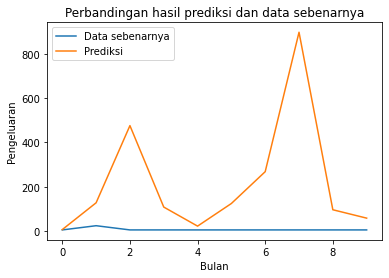

In [24]:

df_true = df.tail(10)
y_true = df_true[[col]].values


x_pred = [[15]]
predictions = {}
for col, model in models.items():
    prediction = model.predict(x_pred)[0][0]
    predictions[col] = prediction
    df_predictions = pd.DataFrame.from_dict(predictions, orient='index', columns=['Prediction'])
y_pred = np.array(df_predictions.head(10)['Prediction']).reshape(-1, 1)


plt.plot(y_true, label='Data sebenarnya')
plt.plot(y_pred, label='Prediksi')
plt.xlabel('Bulan')
plt.ylabel('Pengeluaran')
plt.title('Perbandingan hasil prediksi dan data sebenarnya')
plt.legend()
plt.show()

In [25]:
df_pred = pd.DataFrame.from_dict(predictions, orient='index', columns=['prediksi']).reset_index()
df_pred = df_pred.rename(columns={'index': 'barang'})

In [26]:
df_pred = pd.DataFrame(predictions, index=[0])

In [27]:
print(df_pred)

    AIR AKI  AMPLAS DISC P-80  AMPLAS DISC P.120 5"  AMPLAS DISC SUSUN GRIT  \
0  6.528309        127.567747            476.147989              108.268255   

   AMPLAS EKAMET 4" x 400  AMPLAS NO 1200  AMPLAS NO 2000  AMPLAS NO 400  \
0               22.142913      124.397891      268.096447     897.960172   

   AMPLAS NO 80  AMPLAS ROLL / BELT UK 50 x 20 #240  ...       SAGU  \
0     96.063647                           58.199922  ...  14.602889   

   SARUNG TANGAN 5 BENANG  SARUNG TANGAN PENGANTIN  SIKAT KAWAT HALUS  \
0              909.697774               397.624365                0.0   

   SIKAT KAWAT KASAR  SPONGE BUFF  TALI RAFIA  TALI STRAPPING BAND KUNING  \
0           1.142913    36.906677   14.481843                   17.422882   

      WD-40  WD-SILICON  
0  5.995705   10.416244  

[1 rows x 168 columns]


In [28]:
df = pd.read_excel('DATA OUT CONS.xlsx')
df

,Item,AIR AKI,AMPLAS DISC P-80,"AMPLAS DISC P.120 5""",AMPLAS DISC SUSUN GRIT,"AMPLAS EKAMET 4"" x 400",AMPLAS NO 1200,AMPLAS NO 2000,AMPLAS NO 400,AMPLAS NO 80,...,SAGU,SARUNG TANGAN 5 BENANG,SARUNG TANGAN PENGANTIN,SIKAT KAWAT HALUS,SIKAT KAWAT KASAR,SPONGE BUFF,TALI RAFIA,TALI STRAPPING BAND KUNING,WD-40,WD-SILICON
0,JAN_22,10,300,250,80,0,405,100,700,300,...,0,1428,384,0,0,70,2,10,24,12
1,FEB_22,5,50,150,60,0,220,200,300,100,...,0,1388,240,0,0,40,8,8,8,0
2,MAR_22,5,250,900,330,100,0,200,1700,200,...,50,1092,360,0,0,40,4,0,2,25
3,APR_22,10,200,400,140,0,0,0,400,200,...,25,1128,312,0,0,0,0,20,3,0
4,MEI_22,10,50,430,50,0,0,200,706,50,...,0,910,388,0,0,0,1,23,5,0
5,JUN_22,10,0,500,70,0,100,100,1049,0,...,0,900,396,0,6,19,8,0,8,24
6,JUL_22,10,125,600,90,0,100,100,900,125,...,25,2067,324,0,0,54,16,4,7,0
7,AGS_22,5,500,600,110,0,300,0,500,500,...,25,788,228,0,3,45,5,0,0,0
8,SEP_22,5,100,100,50,0,200,300,500,100,...,0,867,336,0,1,15,13,0,8,0
9,OKT_22,0,0,460,100,0,100,300,400,0,...,0,924,204,0,0,66,24,4,0,0


In [29]:
df1 = pd.concat([df1.loc[:15], df_pred])

In [30]:
df1 = df1.fillna(0)
df1.set_index(pd.Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]), inplace=True)
df1 

,Bulan,AIR AKI,AMPLAS DISC P-80,"AMPLAS DISC P.120 5""",AMPLAS DISC SUSUN GRIT,"AMPLAS EKAMET 4"" x 400",AMPLAS NO 1200,AMPLAS NO 2000,AMPLAS NO 400,AMPLAS NO 80,...,SAGU,SARUNG TANGAN 5 BENANG,SARUNG TANGAN PENGANTIN,SIKAT KAWAT HALUS,SIKAT KAWAT KASAR,SPONGE BUFF,TALI RAFIA,TALI STRAPPING BAND KUNING,WD-40,WD-SILICON
0,5.0,10.000000,300.000000,250.000000,80.000000,7.000000,405.000000,100.000000,700.000000,300.000000,...,9.000000,1428.000000,384.000000,0.0,0.000000,70.000000,2.000000,10.000000,24.000000,12.000000
1,3.0,5.000000,50.000000,150.000000,60.000000,7.000000,220.000000,200.000000,300.000000,100.000000,...,9.000000,1388.000000,240.000000,0.0,0.000000,40.000000,8.000000,8.000000,8.000000,5.000000
2,9.0,5.000000,250.000000,900.000000,330.000000,100.000000,123.000000,200.000000,1700.000000,200.000000,...,50.000000,1092.000000,360.000000,0.0,0.000000,40.000000,4.000000,9.000000,2.000000,25.000000
3,1.0,10.000000,200.000000,400.000000,140.000000,7.000000,123.000000,135.000000,400.000000,200.000000,...,25.000000,1128.000000,312.000000,0.0,0.000000,29.000000,8.000000,20.000000,3.000000,5.000000
4,10.0,10.000000,50.000000,430.000000,50.000000,7.000000,123.000000,200.000000,706.000000,50.000000,...,9.000000,910.000000,388.000000,0.0,0.000000,29.000000,1.000000,23.000000,5.000000,5.000000
5,8.0,10.000000,146.000000,500.000000,70.000000,7.000000,100.000000,100.000000,1049.000000,146.000000,...,9.000000,900.000000,396.000000,0.0,6.000000,19.000000,8.000000,9.000000,8.000000,24.000000
6,7.0,10.000000,125.000000,600.000000,90.000000,7.000000,100.000000,100.000000,900.000000,125.000000,...,25.000000,2067.000000,324.000000,0.0,0.000000,54.000000,16.000000,4.000000,7.000000,5.000000
7,6.0,5.000000,500.000000,600.000000,110.000000,7.000000,300.000000,135.000000,500.000000,500.000000,...,25.000000,788.000000,228.000000,0.0,3.000000,45.000000,5.000000,9.000000,5.000000,5.000000
8,13.0,5.000000,100.000000,100.000000,50.000000,7.000000,200.000000,300.000000,500.000000,100.000000,...,9.000000,867.000000,336.000000,0.0,1.000000,15.000000,13.000000,9.000000,8.000000,5.000000
9,12.0,6.000000,146.000000,460.000000,100.000000,7.000000,100.000000,300.000000,400.000000,146.000000,...,9.000000,924.000000,204.000000,0.0,0.000000,66.000000,24.000000,4.000000,5.000000,5.000000


In [31]:
df1 = df1.astype(int)
df1

,Bulan,AIR AKI,AMPLAS DISC P-80,"AMPLAS DISC P.120 5""",AMPLAS DISC SUSUN GRIT,"AMPLAS EKAMET 4"" x 400",AMPLAS NO 1200,AMPLAS NO 2000,AMPLAS NO 400,AMPLAS NO 80,...,SAGU,SARUNG TANGAN 5 BENANG,SARUNG TANGAN PENGANTIN,SIKAT KAWAT HALUS,SIKAT KAWAT KASAR,SPONGE BUFF,TALI RAFIA,TALI STRAPPING BAND KUNING,WD-40,WD-SILICON
0,5,10,300,250,80,7,405,100,700,300,...,9,1428,384,0,0,70,2,10,24,12
1,3,5,50,150,60,7,220,200,300,100,...,9,1388,240,0,0,40,8,8,8,5
2,9,5,250,900,330,100,123,200,1700,200,...,50,1092,360,0,0,40,4,9,2,25
3,1,10,200,400,140,7,123,135,400,200,...,25,1128,312,0,0,29,8,20,3,5
4,10,10,50,430,50,7,123,200,706,50,...,9,910,388,0,0,29,1,23,5,5
5,8,10,146,500,70,7,100,100,1049,146,...,9,900,396,0,6,19,8,9,8,24
6,7,10,125,600,90,7,100,100,900,125,...,25,2067,324,0,0,54,16,4,7,5
7,6,5,500,600,110,7,300,135,500,500,...,25,788,228,0,3,45,5,9,5,5
8,13,5,100,100,50,7,200,300,500,100,...,9,867,336,0,1,15,13,9,8,5
9,12,6,146,460,100,7,100,300,400,146,...,9,924,204,0,0,66,24,4,5,5


In [32]:
df1['Bulan']  = ['JAN_22', 'FEB_22', 'MAR_22', 'APR_22', 'MEI_22', 'JUN_22', 'JUL_22', 'AUG-22', 'SEP_22', 'OKT_22', 'NOV_22', 'DES_22', 'JAN_23', 'FEB_23', 'MAR_23']
df1

,Bulan,AIR AKI,AMPLAS DISC P-80,"AMPLAS DISC P.120 5""",AMPLAS DISC SUSUN GRIT,"AMPLAS EKAMET 4"" x 400",AMPLAS NO 1200,AMPLAS NO 2000,AMPLAS NO 400,AMPLAS NO 80,...,SAGU,SARUNG TANGAN 5 BENANG,SARUNG TANGAN PENGANTIN,SIKAT KAWAT HALUS,SIKAT KAWAT KASAR,SPONGE BUFF,TALI RAFIA,TALI STRAPPING BAND KUNING,WD-40,WD-SILICON
0,JAN_22,10,300,250,80,7,405,100,700,300,...,9,1428,384,0,0,70,2,10,24,12
1,FEB_22,5,50,150,60,7,220,200,300,100,...,9,1388,240,0,0,40,8,8,8,5
2,MAR_22,5,250,900,330,100,123,200,1700,200,...,50,1092,360,0,0,40,4,9,2,25
3,APR_22,10,200,400,140,7,123,135,400,200,...,25,1128,312,0,0,29,8,20,3,5
4,MEI_22,10,50,430,50,7,123,200,706,50,...,9,910,388,0,0,29,1,23,5,5
5,JUN_22,10,146,500,70,7,100,100,1049,146,...,9,900,396,0,6,19,8,9,8,24
6,JUL_22,10,125,600,90,7,100,100,900,125,...,25,2067,324,0,0,54,16,4,7,5
7,AUG-22,5,500,600,110,7,300,135,500,500,...,25,788,228,0,3,45,5,9,5,5
8,SEP_22,5,100,100,50,7,200,300,500,100,...,9,867,336,0,1,15,13,9,8,5
9,OKT_22,6,146,460,100,7,100,300,400,146,...,9,924,204,0,0,66,24,4,5,5
